In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import numpy as np
# X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [26]:
data = pd.read_excel('Model_Training_Data.xlsx')
data.head()
# len(data)

,Ticker,TR_HQ_Country,TR_HQ_State/Province,TR_HQ_City,Company Name,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,Social Risk Score,Governance Risk Score,Controversy Level Risk Text,Agg. Score,Environment Risk %,Social Risk %,Governance Risk %,Environment Risk Rank,Social Risk Rank,Governance Risk Rank,Total
0,WPX,Tulsa,Oklahoma,United states of america,WPX Energy Inc.,61,Severe,99th percentile,31.9,18.1,10.6,Moderate,60.6,0.526403,0.298680,0.174917,1,2,3,6
1,CLR,Oklahoma city,Oklahoma,United states of america,Continental Resources Inc.,54,Severe,97th percentile,28.3,15.0,10.8,Low,54.1,0.523105,0.277264,0.199630,1,2,3,6
2,AR,Denver,Colorado,United states of america,Antero Resources Corporation,55,Severe,97th percentile,28.2,16.4,10.2,Moderate,54.8,0.514599,0.299270,0.186131,1,2,3,6
3,XEC,Denver,Colorado,United states of america,Cimarex Energy Co,52,Severe,96th percentile,27.7,13.9,10.4,Moderate,52.0,0.532692,0.267308,0.200000,1,2,3,6
4,CXO,Midland,Texas,United states of america,Concho Resources Inc.,52,Severe,96th percentile,27.2,14.0,10.6,Low,51.8,0.525097,0.270270,0.204633,1,2,3,6


In [28]:
data_sorted = data.sort_values(by='Environment Risk Score', ascending=False)
data_sorted.reset_index(inplace=True)
data_sorted.head(10)

,index,Ticker,TR_HQ_Country,TR_HQ_State/Province,TR_HQ_City,Company Name,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,...,Governance Risk Score,Controversy Level Risk Text,Agg. Score,Environment Risk %,Social Risk %,Governance Risk %,Environment Risk Rank,Social Risk Rank,Governance Risk Rank,Total
0,0,WPX,Tulsa,Oklahoma,United states of america,WPX Energy Inc.,61,Severe,99th percentile,31.9,...,10.6,Moderate,60.6,0.526403,0.298680,0.174917,1,2,3,6
1,1,CLR,Oklahoma city,Oklahoma,United states of america,Continental Resources Inc.,54,Severe,97th percentile,28.3,...,10.8,Low,54.1,0.523105,0.277264,0.199630,1,2,3,6
2,2,AR,Denver,Colorado,United states of america,Antero Resources Corporation,55,Severe,97th percentile,28.2,...,10.2,Moderate,54.8,0.514599,0.299270,0.186131,1,2,3,6
3,3,XEC,Denver,Colorado,United states of america,Cimarex Energy Co,52,Severe,96th percentile,27.7,...,10.4,Moderate,52.0,0.532692,0.267308,0.200000,1,2,3,6
4,4,CXO,Midland,Texas,United states of america,Concho Resources Inc.,52,Severe,96th percentile,27.2,...,10.6,Low,51.8,0.525097,0.270270,0.204633,1,2,3,6
5,5,COG,Houston,Texas,United states of america,Cabot Oil & Gas Corporation,51,Severe,95th percentile,24.6,...,10.1,Low,50.8,0.484252,0.316929,0.198819,1,2,3,6
6,6,CF,Deerfield,Illinois,United states of america,CF Industries Holdings Inc.,48,Severe,93rd percentile,24.4,...,7.8,Moderate,48.4,0.504132,0.334711,0.161157,1,2,3,6
7,7,EOG,Houston,Texas,United states of america,EOG Resources Inc.,45,Severe,89th percentile,24.0,...,8.0,Low,44.8,0.535714,0.285714,0.178571,1,2,3,6
8,8,RRC,Fort worth,Texas,United states of america,Range Resources Corporation,46,Severe,91st percentile,23.9,...,9.7,Moderate,46.0,0.519565,0.269565,0.210870,1,2,3,6
9,9,MRO,Houston,Texas,United states of america,Marathon Oil Corporation,43,Severe,86th percentile,23.7,...,8.6,Moderate,43.2,0.548611,0.252315,0.199074,1,2,3,6


In [20]:
data_no_outliers = data_sorted.iloc[7:]
data_no_outliers.tail(10)
# len(data_no_outliers['Governance Risk Score'])

,index,Ticker,TR_HQ_Country,TR_HQ_State/Province,TR_HQ_City,Company Name,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,...,Governance Risk Score,Controversy Level Risk Text,Agg. Score,Environment Risk %,Social Risk %,Governance Risk %,Environment Risk Rank,Social Risk Rank,Governance Risk Rank,Total
678,67,ATO.PA,Bezons,Ile-de-france,France,Atos SE,14,Negligible,5th percentile,0.0,...,6.0,Moderate,14.0,0.0,0.571429,0.428571,3,1,2,6
679,193,DELL,Round rock,Texas,United states of america,Dell Technologies Inc.,17,Negligible,12th percentile,0.0,...,9.0,Moderate,17.0,0.0,0.470588,0.529412,3,2,1,6
680,104,BVI.PA,Neuilly-sur-seine,Ile-de-france,France,Bureau Veritas SA,16,Negligible,9th percentile,0.0,...,7.0,Moderate,17.0,0.0,0.588235,0.411765,3,1,2,6
681,346,JEF,New york,New york,United states of america,Jefferies Financial Group Inc.,14,Negligible,4th percentile,0.0,...,10.0,Moderate,14.0,0.0,0.285714,0.714286,3,2,1,6
682,467,ONEX.TO,Toronto,Ontario,Canada,Onex Corporation,17,Negligible,10th percentile,0.0,...,13.0,NaN,17.0,0.0,0.235294,0.764706,3,2,1,6
683,218,DXC,Tysons corner,Virginia,United states of america,DXC Technology Company,16,Low,8th percentile,0.0,...,5.8,Moderate,15.7,0.0,0.630573,0.369427,3,1,2,6
684,9,AAP,Raleigh,North carolina,United states of america,Advance Auto Parts Inc W/I,13,Negligible,4th percentile,0.0,...,4.0,Moderate,13.0,0.0,0.692308,0.307692,3,1,2,6
685,118,KMX,Richmond,Virginia,United states of america,CarMax Inc,13,Negligible,4th percentile,0.0,...,4.0,Moderate,13.0,0.0,0.692308,0.307692,3,1,2,6
686,405,MAT,El segundo,California,United states of america,Mattel Inc.,14,Low,5th percentile,0.0,...,5.8,Significant,13.9,0.0,0.582734,0.417266,3,1,2,6
687,652,VIV.PA,Paris,Ile-de-france,France,Vivendi SA,13,Negligible,4th percentile,0.0,...,8.0,Moderate,13.0,0.0,0.384615,0.615385,3,2,1,6


In [ ]:
# # data_list = []
# all_scores = data_no_outliers[['Environment Risk Rank','Social Risk Rank','Governance Risk Rank']]
# score_array = np.array(all_scores)
# # print(all_scores)
# # data_list.append(score_array)
    

In [ ]:
#  = np.asmatrix(x)
# score_array

In [6]:
all_scores = data_no_outliers[['Environment Risk Score','Social Risk Score','Governance Risk Score']]
score_array = np.array(all_scores)

all_percentages = data_no_outliers[['Environment Risk %','Social Risk %','Governance Risk %']]
percentages_array = np.array(all_percentages)

all_ranks = data_no_outliers[['Environment Risk Rank','Social Risk Rank','Governance Risk %']]
ranks_array = np.array(all_ranks)

In [7]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans_score = KMeans(n_clusters=6)
# Fit the model to the data
kmeans_score.fit(score_array)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_score = kmeans_score.predict(score_array)
len(predicted_clusters_score)

681

In [8]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans_percentage = KMeans(n_clusters=6)
# Fit the model to the data
kmeans_percentage.fit(percentages_array)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_percentage = kmeans_percentage.predict(percentages_array)
len(predicted_clusters_percentage)

681

In [9]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans_rank = KMeans(n_clusters=6)
# Fit the model to the data
kmeans_rank.fit(ranks_array)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters_rank = kmeans_rank.predict(ranks_array)
len(predicted_clusters_rank)

681

In [ ]:
# # Create a kmeans model using k = 12
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=6)
# # Fit the model to the data
# kmeans.fit(score_array)
# # Use the data to predict the clusters
# # save the predictions as `predicted_clusters`
# predicted_clusters = kmeans.predict(score_array)

In [ ]:
# new_data = np.array([[2,1,3]])
# new_predicted_clusters = kmeans.predict(new_data)

In [ ]:
# new_predicted_clusters

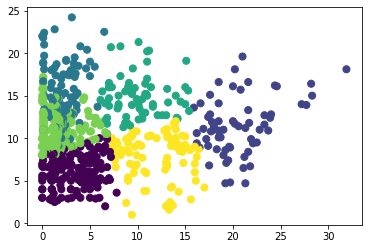

In [10]:
# Plot the clusters
plt.scatter(score_array[:, 0], score_array[:, 1], c=predicted_clusters_score, s=50, cmap='viridis')
plt.show()

In [11]:
groupings_scores = pd.DataFrame(predicted_clusters_score)
groupings_percentages = pd.DataFrame(predicted_clusters_percentage)
groupings_ranks = pd.DataFrame(predicted_clusters_rank)
len(groupings_scores)
len(groupings_percentages)



681

In [22]:
data_no_outliers['Groupings by Score'] = groupings_scores
data_no_outliers['Groupings by Percentage'] = groupings_percentages
data_no_outliers['Groupings by Ranks'] = groupings_ranks

C:\Users\s01la\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\s01la\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\s01la\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [23]:
data_no_outliers.tail(10)

,index,Ticker,TR_HQ_Country,TR_HQ_State/Province,TR_HQ_City,Company Name,ESG Risk Score,ESG Risk Score Level,ESG Risk Score Percentile,Environment Risk Score,...,Environment Risk %,Social Risk %,Governance Risk %,Environment Risk Rank,Social Risk Rank,Governance Risk Rank,Total,Groupings by Score,Groupings by Percentage,Groupings by Ranks
678,67,ATO.PA,Bezons,Ile-de-france,France,Atos SE,14,Negligible,5th percentile,0.0,...,0.0,0.571429,0.428571,3,1,2,6,4.0,0.0,0.0
679,193,DELL,Round rock,Texas,United states of america,Dell Technologies Inc.,17,Negligible,12th percentile,0.0,...,0.0,0.470588,0.529412,3,2,1,6,4.0,0.0,0.0
680,104,BVI.PA,Neuilly-sur-seine,Ile-de-france,France,Bureau Veritas SA,16,Negligible,9th percentile,0.0,...,0.0,0.588235,0.411765,3,1,2,6,0.0,3.0,3.0
681,346,JEF,New york,New york,United states of america,Jefferies Financial Group Inc.,14,Negligible,4th percentile,0.0,...,0.0,0.285714,0.714286,3,2,1,6,NaN,NaN,NaN
682,467,ONEX.TO,Toronto,Ontario,Canada,Onex Corporation,17,Negligible,10th percentile,0.0,...,0.0,0.235294,0.764706,3,2,1,6,NaN,NaN,NaN
683,218,DXC,Tysons corner,Virginia,United states of america,DXC Technology Company,16,Low,8th percentile,0.0,...,0.0,0.630573,0.369427,3,1,2,6,NaN,NaN,NaN
684,9,AAP,Raleigh,North carolina,United states of america,Advance Auto Parts Inc W/I,13,Negligible,4th percentile,0.0,...,0.0,0.692308,0.307692,3,1,2,6,NaN,NaN,NaN
685,118,KMX,Richmond,Virginia,United states of america,CarMax Inc,13,Negligible,4th percentile,0.0,...,0.0,0.692308,0.307692,3,1,2,6,NaN,NaN,NaN
686,405,MAT,El segundo,California,United states of america,Mattel Inc.,14,Low,5th percentile,0.0,...,0.0,0.582734,0.417266,3,1,2,6,NaN,NaN,NaN
687,652,VIV.PA,Paris,Ile-de-france,France,Vivendi SA,13,Negligible,4th percentile,0.0,...,0.0,0.384615,0.615385,3,2,1,6,NaN,NaN,NaN


In [ ]:
data_no_outliers.to_excel('Model_Output_All_Groupings.xlsx', index=None)

In [ ]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [ ]:
centers

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()